(-2000.0, 2000.0)

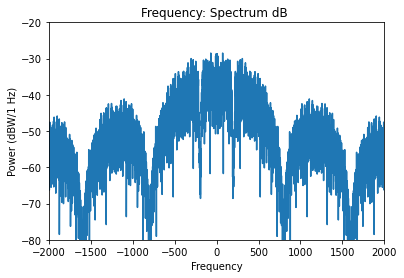

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

plt.close('all')

#Sampling
Fs = 40e3 # samples per second
Ts = 1/Fs
Ns = int(Fs)            #if =FS then resolution = 1
t = np.arange(Ns) * Ts # time vector for carrier 
fftsize = Ns #Full length FFT
resolution = Fs / fftsize
f = np.arange(-Fs/2, Fs/2,resolution)


#Pulses
pulse_span = 50
pulse_duration = pulse_span*Ts
data = np.random.randint(0,2,int(Ns/pulse_span))
data = (data - 0.5) 

x = np.zeros((Ns))
for i in range(len(data)):
    
    increment_low = i*pulse_span
    increment_high = increment_low + pulse_span
    x[increment_low:increment_high] = data[i]
    
    
#Filter Function
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = signal.iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

x = Implement_Notch_Filter(1/Fs,50,200,0.5,2,'butter',x)



#Spectrum
X = np.fft.fft(x,fftsize)/fftsize
X = np.fft.fftshift(X)
X = abs(X)
X_PSD = 10*np.log10(              abs((X))               **2)
    

fig = plt.figure(2)
ax = fig.add_subplot(111)
ax.title.set_text('Frequency: Spectrum dB ')
ax.plot(f,X_PSD)
plt.ylabel('Power (dBW/' + str(int(resolution)) + ' Hz)')
plt.xlabel('Frequency')
plt.ylim([-80, -20 ])
plt.xlim([-2000, 2000])

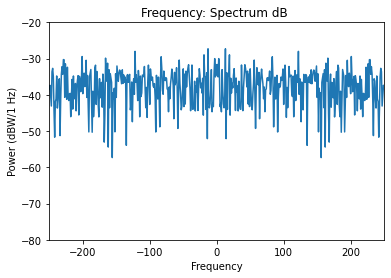

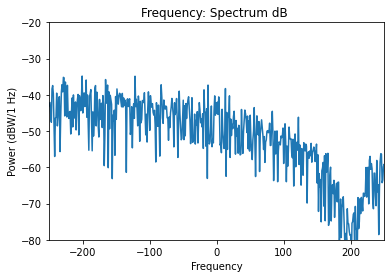

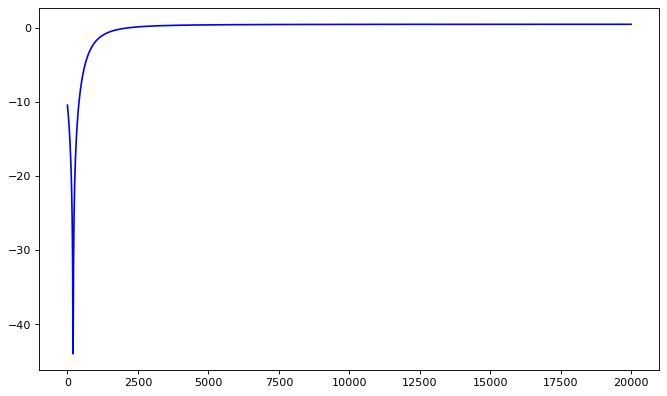

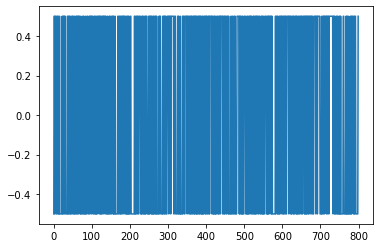

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

import cmath

#Sampling
Fs = 40e3 # samples per second
Ts = 1/Fs
Ns = int(Fs)            #if =FS then resolution = 1
t = np.arange(Ns) * Ts # time vector for carrier 
fftsize = Ns #Full length FFT
resolution = Fs / fftsize
f = np.arange(-Fs/2, Fs/2,resolution)

#Pulses
pulse_span = 50
pulse_duration = pulse_span*Ts
data = np.random.randint(0,2,int(Ns/pulse_span))
data = (data - 0.5) 

x = np.zeros((Ns))
for i in range(len(data)):
    
    increment_low = i*pulse_span
    increment_high = increment_low + pulse_span
    x[increment_low:increment_high] = data[i]

# Page 20 of https://courses.engr.illinois.edu/ece401/fa2020/slides/lec14.pdf
def Implement_Simple_Notch_Filter(time, freq, data):
    b = [1, -cmath.exp(1j*freq*time*2*3.13145926)]
    a = [1, -0.9*cmath.exp(1j*freq*time*2*3.13145926)]
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data,b,a    

y, b, a = Implement_Simple_Notch_Filter(1/Fs,200,x)

def plt_spectrum(x, figNo = 1):
    #Spectrum
    X = np.fft.fft(x,fftsize)/fftsize
    X = np.fft.fftshift(X)
    X = abs(X)
    X_PSD = 10*np.log10(abs((X))**2 + 10**(-100))


    fig = plt.figure(figNo)
    ax = fig.add_subplot(111)
    ax.title.set_text('Frequency: Spectrum dB ')
    ax.plot(f,X_PSD)
    plt.ylabel('Power (dBW/' + str(int(resolution)) + ' Hz)')
    plt.xlabel('Frequency')
    plt.ylim([-80, -20 ])
    plt.xlim([-250, 250])
    
plt_spectrum(x)
plt_spectrum(y,2)
w, h = signal.freqz(b,a,2048)
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(w/3.14159*Fs/2, 20 * np.log10(abs(h)), 'b')
plt.figure(4)
plt.plot(data)


In [23]:

print(b)
print(a)

[1, (-0.9999875000260416-0.004999979166692708j)]
[1, (-0.9998875012760391-0.0049994791687760385j)]
